# User's Guide, Chapter 23: Roman Numeral Analysis

F major is a chord that has the notes F, A, and usually C.  Those notes, placed in the same octave, instrument, dynamics, etc., should have basically the same acoustical properties each time it's played, but human perception of this chord can seem to vary dramatically depending on the context the chord is placed in.  One of the most powerful contexts that can give the same isolated sound remarkably different meanings comes from its surrounding key.

Roman numeral analysis is a way to identify certain similarities in tonal music (whether classical, folk, or popular) that have traditionally been assigned to different chords that appear on the same scale degrees in different keys.

Let's create an F-major chord but convert it to roman numerals in a few different contexts by creating different key objects.  First the setup:

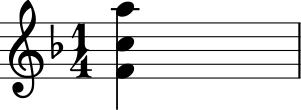

In [1]:
f = chord.Chord('F4 C5 A5')
kf = key.Key('F')
sf = stream.Measure([kf, f])
sf.show()

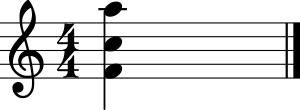

In [2]:
kc = key.Key('C')
sc = stream.Part([kc, f])
sc.show()

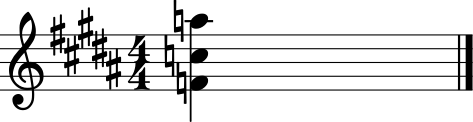

In [3]:
kb = key.Key('B') 
sb = stream.Part([kb, f])
sb.show()

Now that we have four different keys, let's create Roman numerals from the F major chord and each of the keys.  We will use a function from the :ref:`moduleRoman` module called :func:`~music21.roman.romanNumeralFromChord` (which we saw briefly in :ref:`Chapter 10 <usersGuide_10_examples1>`).  We pass to this function a `Chord` object and a `Key` object.

In [4]:
rf = roman.romanNumeralFromChord(f, kf)
rf

<music21.roman.RomanNumeral I in F major>

In [5]:
rc = roman.romanNumeralFromChord(f, kc)
rc

<music21.roman.RomanNumeral IV in C major>

`Music21` tries its best to find a Roman numeral for almost any combination of chord and key, even if, like in B major:

In [6]:
rb = roman.romanNumeralFromChord(f, kb)
rb

<music21.roman.RomanNumeral bV in B major>

Each :class:`~music21.roman.RomanNumeral` object has some common properties, such as `.figure`, `.figureAndKey`, `.romanNumeralAlone`, `.key`, and `.scaleDegree`:

In [7]:
(rf.figure, rc.figure, rb.figure)

('I', 'IV', 'bV')

In [8]:
rf.figureAndKey

'I in F major'

In [9]:
(rf.romanNumeralAlone, rc.romanNumeralAlone, rb.romanNumeralAlone)

('I', 'IV', 'V')

In [10]:
(rf.key, rc.key, rb.key)

(<music21.key.Key of F major>,
 <music21.key.Key of C major>,
 <music21.key.Key of B major>)

In [11]:
(rf.scaleDegree, rc.scaleDegree, rb.scaleDegree)

(1, 4, 5)

Note that in the last case, the scale degree is the uninflicted degree -- the flat sign isn't included in the `.scaleDegree` tag.  For that, use `.scaleDegreeWithAlteration`

In [12]:
rf.scaleDegreeWithAlteration

(1, None)

In [13]:
rb.scaleDegreeWithAlteration

(5, <accidental flat>)

Or look at the `.frontAlterationString`, `frontAlterationAccidental`, and `frontAlterationTransposeInterval`

In [14]:
rb.frontAlterationString

'b'

In [15]:
rb.frontAlterationAccidental

<accidental flat>

In [16]:
rb.frontAlterationTransposeInterval

<music21.interval.Interval d1>

Of course, some RomanNumerals make more sense than others, so there's a `.functionalityScore` which returns a number from 0 to 100 as a rough approximation of how "functional" this chord is:

In [17]:
(rf.functionalityScore, rc.functionalityScore, rb.functionalityScore)

(100, 59, 0)

As I hinted at above, `RomanNumeral` objects are `Music21Objects` so they can be put into Streams and showed:

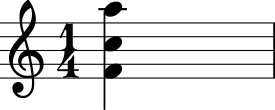

In [18]:
s = stream.Measure()
s.insert(0, rf)
s.show()

Note that the spacing of the roman numeral is preserved from the chord that it was converted from.  If we create a `RomanNumeral` object directly, then it is created in closed position above a tonic note in octave 4:

In [19]:
rf2 = roman.RomanNumeral('I', kf)
rf2

<music21.roman.RomanNumeral I in F major>

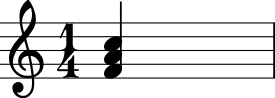

In [20]:
rf2.show()

It is possible to pass in just a roman numeral ("I", "ii", "iii", "IV", etc.) and a string ("C" = C major, "c" = c minor) to create a RomanNumeral object:

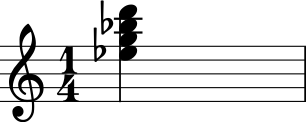

In [21]:
subDom7 = roman.RomanNumeral("IV7", "B-")
subDom7.show()

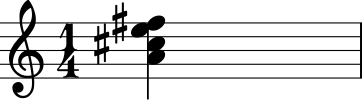

In [22]:
e65 = roman.RomanNumeral("ii65", "E")
e65.show()

For these romanNumerals, there is information after the `.romanNumeralAlone` this can be found as a string in `.figuresWritten`:

In [23]:
(subDom7.figuresWritten, e65.figuresWritten)

('7', '65')

These numbers can also be found as part of a more powerful `figuredBass.Notation` object (to be discussed later) in the `.figuresNotationObj` attribute:

In [24]:
(subDom7.figuresNotationObj, e65.figuresNotationObj)

(<music21.figuredBass.notation.Notation 7>,
 <music21.figuredBass.notation.Notation 6,5>)

In [25]:
e65.figuresNotationObj.numbers

(6, 5, 3)

Many of these properties can be changed:

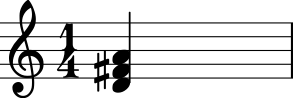

In [26]:
rf.key = key.Key('D')
rf.show()

Changing the key removes any information about pitch spacing.  You can't have everything.  :-)

We'll put the key of F back and the original pitches before we forget:

In [27]:
rf = roman.romanNumeralFromChord(f, kf)

## RomanNumerals as Chords

A `RomanNumeral` object is a subclass of a Chord object, therefore we can do everything with them that we could do with a chord.  For instance:

In [28]:
rf.isMajorTriad()

True

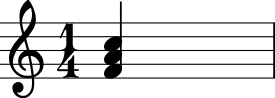

In [29]:
rfc = rf.closedPosition()
rfc.show()

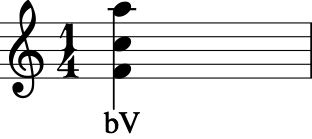

In [30]:
rb.lyric = rb.figure
rb.show()

In [31]:
(rf.quality, rc.quality, rb.quality)

('major', 'major', 'major')

In [32]:
e65.inversion()

1

In [33]:
e65.primeForm

[0, 3, 5, 8]

In [34]:
e65.semitonesFromChordStep(7)

10

That's all we have for RomanNumerals for now -- we will return to RomanNumeral like objects later when we look at other Harmony objects such as ChordSymbols and FiguredBass and we look at the romanText module.  But we'll take a break from musical objects and get acquainted a bit better with how your system works when running `music21` with a look at :ref:`Chapter 24, Environment <usersGuide_24_environment>`. 